<a href="https://colab.research.google.com/github/takiyama0617/colaboratory/blob/master/Sample_TensorFlow%2BKeras%2BMNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kerasとは
複数のバックエンドの深層学習フレームワークで共通なPythonプログラミング手法を提供するニューラルネットワークライブラリのラッパー


## Kerasのバックエンドエンジン
Kerasのバックエンドエンジン（深層学習フレームワーク）として、以下の３つに接続出来る。
* TensorFlow
 * Google製。人気あるみたい。
* Theano
 * カナダのどっかの大学が主導している。
* CNTK
 * Microsoft製。

## Kerasを用いた処理フロー
1. データを用意する
 1. データロード
 1. 前処理
1. モデルを構築する
 1. モデルを定義する
 1. モデルにレイヤーを追加
1. 学習する
1. 検証・評価する

In [14]:
!pip install tensorflow

In [15]:
import tensorflow as tf

print(tf.__version__)

1.15.0


In [16]:
!pip install keras

In [17]:
import keras

print(keras.__version__)

2.2.5


In [0]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 10
IMG_ROWS, IMG_COLS = 28, 28

In [0]:
handwritten_number_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [20]:
from keras.datasets import mnist

(train_data, train_teacher_labels), (test_data, test_teacher_labels) = mnist.load_data()

print('ロードしたあとの学習データ train_data shape : ', train_data.shape)
print('ロードしたあとの検証データ test_data shape : ', test_data.shape)

ロードしたあとの学習データ train_data shape :  (60000, 28, 28)
ロードしたあとの検証データ test_data shape :  (10000, 28, 28)


* **学習データ**：学習フェーズで使用するデータ。データセットの７割、８割を学習データとして使うのが一般的。
* **検証データ**：学習後、学習済みモデルの性能をテストするためのデータ。データセットの学習データ以外の２割、３割のデータを使うのが一般的。

## 学習モデルに合わせたデータ配列の形状変換とデータ調整

In [21]:
from keras import backend as Keras

print('Channel調節変換前 train_data shape : ', train_data.shape)
print('Channel調節変換前 test_data shape : ', test_data.shape)

if Keras.image_data_format() == 'channels_first' :
  train_data = train_data.reshape(train_data.shape[0], 1, IMG_ROWS, IMG_COLS)
  test_data = test_data.reshape(test_data.shape[0], 1, IMG_ROWS, IMG_COLS)
  input_shape = (1, IMG_ROWS, IMG_COLS)
else :
  train_data = train_data.reshape(train_data.shape[0], IMG_ROWS, IMG_COLS, 1)
  test_data = test_data.reshape(test_data.shape[0], IMG_ROWS, IMG_COLS, 1)
  input_shape = (IMG_ROWS, IMG_COLS, 1)

print('Channel調節変換後 train_data shape : ', train_data.shape)
print('Channel調節変換後 test_data shape : ', test_data.shape)


Channel調節変換前 train_data shape :  (60000, 28, 28)
Channel調節変換前 test_data shape :  (10000, 28, 28)
Channel調節変換後 train_data shape :  (60000, 28, 28, 1)
Channel調節変換後 test_data shape :  (10000, 28, 28, 1)


In [22]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print(test_data)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [23]:
train_data /= 255
test_data /= 255

print('学習データ　train_data shape : ', train_data.shape)
print(train_data.shape[0], 'サンプルを学習します')
print('検証データ　test_data shape : ', test_data.shape)
print(test_data.shape[0], 'サンプルを検証します')

学習データ　train_data shape :  (60000, 28, 28, 1)
60000 サンプルを学習します
検証データ　test_data shape :  (10000, 28, 28, 1)
10000 サンプルを検証します


## 教師ラベルデータの変換
* Kerasで分類を行う際は、教師ラベルをOne-hotベクトル（1-of-k表現）変換する必要がある
  * 学習プロセスのmodel.fit()に渡すデータのフォーマットに合わせるため

In [24]:
# 学習用教師ラベルデータをOne-hotベクトルに変換
print('Keras変換前学習用教師ラベルデータ　train_teacher_labels shape : ', train_teacher_labels.shape)
train_teacher_labels = keras.utils.to_categorical(train_teacher_labels, NUM_CLASSES)
print('Keras変換後学習用教師ラベルデータ　train_teacher_labels shape : ', train_teacher_labels.shape)

# 検証用教師ラベルデータをOne-hotベクトルに変換
print('Keras変換前検証用教師ラベルデータ　test_teacher_labels shape : ', test_teacher_labels.shape)
print(test_teacher_labels)
test_teacher_labels = keras.utils.to_categorical(test_teacher_labels, NUM_CLASSES)
print('Keras変換後検証用教師ラベルデータ　test_teacher_labels shape : ', test_teacher_labels.shape)
print(test_teacher_labels)

Keras変換前学習用教師ラベルデータ　train_teacher_labels shape :  (60000,)
Keras変換後学習用教師ラベルデータ　train_teacher_labels shape :  (60000, 10)
Keras変換前検証用教師ラベルデータ　test_teacher_labels shape :  (10000,)
[7 2 1 ... 4 5 6]
Keras変換後検証用教師ラベルデータ　test_teacher_labels shape :  (10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## ニューラルネットワークのモデルの構築

### シーケンシャルモデル指定

In [25]:
from keras.models import Sequential

model = Sequential()

In [0]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

### ニューラルネットワークの構築

In [28]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
___

### モデルのコンパイル
どのような学習処理を行うか以下の設定が必要
* 最適化アルゴリズム
* 損失関数
* 評価関数のリスト

In [29]:
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

## 学習

In [0]:
import matplotlib.pyplot as plt


def plot_loss_accuracy_graph(fir_record) :
  plt.plot(fit_record.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(fit_record.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title('LOSS')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(loc="upper right")
  plt.show()

  plt.plot(fit_record.history['acc'], "-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(fit_record.history['val_acc'], "-D", color="black", label="val_accuracy", linewidth=2)
  plt.title('ACCURACY')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()



In [34]:
print('反復学習回数 : ', EPOCHS)
fit_record = model.fit(train_data,
                       train_teacher_labels,
                       batch_size=BATCH_SIZE,
                       epochs=EPOCHS,
                       verbose=1,
                       validation_data=(test_data, test_teacher_labels)
                       )

反復学習回数 :  10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 202s 3ms/step - loss: 0.2603 - acc: 0.9192 - val_loss: 0.0498 - val_acc: 0.9836
Epoch 2/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0808 - acc: 0.9762 - val_loss: 0.0417 - val_acc: 0.9863
Epoch 3/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0614 - acc: 0.9819 - val_loss: 0.0304 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0496 - acc: 0.9854 - val_loss: 0.0296 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0430 - acc: 0.9870 - val_loss: 0.0274 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0366 - acc: 0.9892 - val_loss: 0.0251 - val_acc: 0.9925
Epoch 7

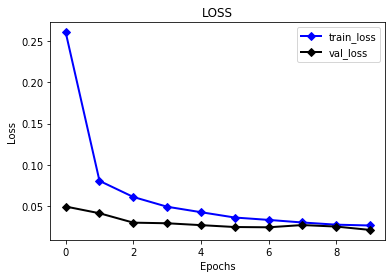

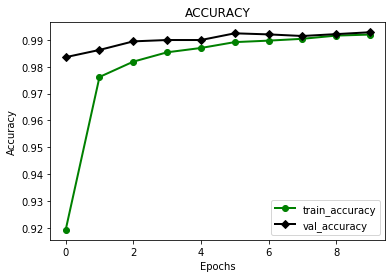

In [37]:
plot_loss_accuracy_graph(fit_record)